# YOUTH EMPLOYMENT DATA DRIVEN INSIGHTS

## INTRODUCTION

The renowned phrase "Youth is wasted on the young" is often used to express frustration towards young individuals who squander their potential. However, in light of the current high youth unemployment rates and the struggles faced by young professionals in securing stable jobs, it seems fitting to turn this phrase on its head. Youth unemployment is a pressing issue that requires immediate attention. The economic downturn has exacerbated the problem, leaving many young people without jobs and few new opportunities. Companies are restructuring and downsizing, resulting in layoffs and further diminishing prospects for young workers. If we don't tackle this issue decisively, our youth will face significant difficulties, ultimately affecting their future.

In this notebook, I intend to utilize the visualizing capabilities of Plotly to create engaging and interactive plots that tell a story. My goal is to delve into the world of the Job Market in Kenya, Rwanda & Ghanaover a period of 2015-2021. By exploring this topic through data and creating a prediction model, I hope to provide a unique perspective on the challenges faced by young people especially in the IT sector in the modern job market and provide feasible solutions to enhance growth in the IT sector.

## DATA UNDERSTANDING

The first step is the import of relevant libraries and tools to be used for analysis

In [197]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
%matplotlib inline

In [96]:
# Loading the datasets into pandas DataFrames
Population_data = pd.read_csv('Population_data.csv')
Kenya = pd.read_csv('Kenya_National.csv')
Ghana = pd.read_csv('Ghana_National.csv')
Rwanda = pd.read_csv('Rwanda_National.csv')

# Previewing the ILO data for Kenya
Kenya.head(5)


,ref_area,ref_area.label,source,source.label,indicator,indicator.label,sex,sex.label,classif1,classif1.label,...,time,obs_value,obs_status,obs_status.label,note_classif,note_classif.label,note_indicator,note_indicator.label,note_source,note_source.label
0,KEN,Kenya,XA:1909,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_T,Sex: Total,ECO_SECTOR_TOTAL,Economic activity (Broad sector): Total,...,2021,22755.313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KEN,Kenya,XA:1909,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_T,Sex: Total,ECO_SECTOR_AGR,Economic activity (Broad sector): Agriculture,...,2021,7516.948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KEN,Kenya,XA:1909,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_T,Sex: Total,ECO_SECTOR_IND,Economic activity (Broad sector): Industry,...,2021,3578.747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KEN,Kenya,XA:1909,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_T,Sex: Total,ECO_SECTOR_SER,Economic activity (Broad sector): Services,...,2021,11659.617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KEN,Kenya,XA:1909,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_M,Sex: Male,ECO_SECTOR_TOTAL,Economic activity (Broad sector): Total,...,2021,11502.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# Previewing the ILO data for Ghana

Ghana.head(5)

,ref_area,ref_area.label,source,source.label,indicator,indicator.label,sex,sex.label,classif1,classif1.label,...,time,obs_value,obs_status,obs_status.label,note_classif,note_classif.label,note_indicator,note_indicator.label,note_source,note_source.label
0,GHA,Ghana,XA:2064,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_T,Sex: Total,ECO_SECTOR_TOTAL,Economic activity (Broad sector): Total,...,2021,13585.984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GHA,Ghana,XA:2064,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_T,Sex: Total,ECO_SECTOR_AGR,Economic activity (Broad sector): Agriculture,...,2021,5365.544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GHA,Ghana,XA:2064,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_T,Sex: Total,ECO_SECTOR_IND,Economic activity (Broad sector): Industry,...,2021,2598.811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GHA,Ghana,XA:2064,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_T,Sex: Total,ECO_SECTOR_SER,Economic activity (Broad sector): Services,...,2021,5621.629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GHA,Ghana,XA:2064,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_M,Sex: Male,ECO_SECTOR_TOTAL,Economic activity (Broad sector): Total,...,2021,7085.316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
# Previewing the ILO data for Rwanda

Rwanda.head(5)

,ref_area,ref_area.label,source,source.label,indicator,indicator.label,sex,sex.label,classif1,classif1.label,...,time,obs_value,obs_status,obs_status.label,note_classif,note_classif.label,note_indicator,note_indicator.label,note_source,note_source.label
0,RWA,Rwanda,XA:2112,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_T,Sex: Total,ECO_SECTOR_TOTAL,Economic activity (Broad sector): Total,...,2021,3977.706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RWA,Rwanda,XA:2112,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_T,Sex: Total,ECO_SECTOR_AGR,Economic activity (Broad sector): Agriculture,...,2021,2174.432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RWA,Rwanda,XA:2112,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_T,Sex: Total,ECO_SECTOR_IND,Economic activity (Broad sector): Industry,...,2021,742.907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RWA,Rwanda,XA:2112,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_T,Sex: Total,ECO_SECTOR_SER,Economic activity (Broad sector): Services,...,2021,1060.366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RWA,Rwanda,XA:2112,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_M,Sex: Male,ECO_SECTOR_TOTAL,Economic activity (Broad sector): Total,...,2021,2169.692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
# Previweing the IIASA population projections 

Population_data.head(5)

,ccode,name,num_code,year,age,sex,population
0,GHA,Ghana,288,2015,15,female,184146.56
1,GHA,Ghana,288,2015,15,male,193092.96
2,GHA,Ghana,288,2015,16,female,269206.88
3,GHA,Ghana,288,2015,16,male,282046.40
4,GHA,Ghana,288,2015,17,female,323915.68


In [100]:
# Combining the Kenya, Ghana and Rwanda Datasets(KGR)

combined_KGR = pd.concat([Kenya, Ghana, Rwanda], axis=0)

In [101]:
# Checking for the size of the combined data

combined_KGR.shape

(53998, 22)

In [102]:
# We are the going to group our data by employment identifiers
# Afterwards we will create a new dataframe(KGR) based of the indicators

indicators = combined_KGR.groupby('indicator')
KGR = indicators.get_group('EMP_2EMP_SEX_ECO_NB')

In [103]:
# We will then convert our new dataframe into a csv file

KGR.to_csv('KGR.csv', index=False)

In [104]:
# Reading the new csv file
df = pd.read_csv('KGR.csv')

# Checking the first 5 rows of our csv file

df.head(5)

,ref_area,ref_area.label,source,source.label,indicator,indicator.label,sex,sex.label,classif1,classif1.label,...,time,obs_value,obs_status,obs_status.label,note_classif,note_classif.label,note_indicator,note_indicator.label,note_source,note_source.label
0,KEN,Kenya,XA:1909,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_T,Sex: Total,ECO_SECTOR_TOTAL,Economic activity (Broad sector): Total,...,2021,22755.313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KEN,Kenya,XA:1909,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_T,Sex: Total,ECO_SECTOR_AGR,Economic activity (Broad sector): Agriculture,...,2021,7516.948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KEN,Kenya,XA:1909,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_T,Sex: Total,ECO_SECTOR_IND,Economic activity (Broad sector): Industry,...,2021,3578.747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KEN,Kenya,XA:1909,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_T,Sex: Total,ECO_SECTOR_SER,Economic activity (Broad sector): Services,...,2021,11659.617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KEN,Kenya,XA:1909,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_M,Sex: Male,ECO_SECTOR_TOTAL,Economic activity (Broad sector): Total,...,2021,11502.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# Checking the last 5 rows of our csv file

df.tail(5)

,ref_area,ref_area.label,source,source.label,indicator,indicator.label,sex,sex.label,classif1,classif1.label,...,time,obs_value,obs_status,obs_status.label,note_classif,note_classif.label,note_indicator,note_indicator.label,note_source,note_source.label
5143,RWA,Rwanda,XA:2112,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_F,Sex: Female,ECO_DETAILS_LMN,Economic activity (Detailed): Real estate; bus...,...,2000,2.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5144,RWA,Rwanda,XA:2112,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_F,Sex: Female,ECO_DETAILS_O,Economic activity (Detailed): Public administr...,...,2000,0.989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5145,RWA,Rwanda,XA:2112,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_F,Sex: Female,ECO_DETAILS_P,Economic activity (Detailed): Education ~ISIC ...,...,2000,6.428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5146,RWA,Rwanda,XA:2112,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_F,Sex: Female,ECO_DETAILS_Q,Economic activity (Detailed): Human health and...,...,2000,3.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5147,RWA,Rwanda,XA:2112,ILO - Modelled Estimates,EMP_2EMP_SEX_ECO_NB,Employment by sex and economic activity -- ILO...,SEX_F,Sex: Female,ECO_DETAILS_RSTU,Economic activity (Detailed): Other services ~...,...,2000,22.746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have succesfully combined the 3 national data files for Kenya, Ghana and Rwanda.

In [106]:
# Checking the data types

df.dtypes

ref_area                 object
ref_area.label           object
source                   object
source.label             object
indicator                object
indicator.label          object
sex                      object
sex.label                object
classif1                 object
classif1.label           object
classif2                float64
classif2.label          float64
time                      int64
obs_value               float64
obs_status               object
obs_status.label         object
note_classif            float64
note_classif.label      float64
note_indicator          float64
note_indicator.label    float64
note_source             float64
note_source.label       float64
dtype: object

## Data Cleaning
#### Employment Data (Kenya, Ghana & Rwanda)
Before going further with our analysis and building our model, we need to have a clean data with us, so a few steps are going to be taken to achieve this.

We will first start with dropping unnecessary columns as we have too many columns that are not really relevant to our analysis.

In [107]:
# Checking our columns

df.columns

Index(['ref_area', 'ref_area.label', 'source', 'source.label', 'indicator',
       'indicator.label', 'sex', 'sex.label', 'classif1', 'classif1.label',
       'classif2', 'classif2.label', 'time', 'obs_value', 'obs_status',
       'obs_status.label', 'note_classif', 'note_classif.label',
       'note_indicator', 'note_indicator.label', 'note_source',
       'note_source.label'],
      dtype='object')

From the list above I'll drop;

*'ref_area','source','source.label','indicator','indicator.label','sex.label','classif1','classif2','obs_status','obs_status.label', 'note_classif', 'note_classif.label','note_indicator', 'note_indicator.label', 'note_source','note_source.label'*

As I find them not relevant to what I trying to achieve in my analysis and predictive model build.

In [108]:
columns_to_drop = ['ref_area', 'source', 'source.label', 'indicator','indicator.label', 'sex.label', 'classif1',
            'classif2', 'obs_status','obs_status.label', 'note_classif', 'note_classif.label',
            'note_indicator', 'note_indicator.label', 'note_source','note_source.label']

df.drop(columns_to_drop, axis = 1, inplace = True)

In [109]:
# Checking the new look of our dataset

df.head()

,ref_area.label,sex,classif1.label,classif2.label,time,obs_value
0,Kenya,SEX_T,Economic activity (Broad sector): Total,NaN,2021,22755.313
1,Kenya,SEX_T,Economic activity (Broad sector): Agriculture,NaN,2021,7516.948
2,Kenya,SEX_T,Economic activity (Broad sector): Industry,NaN,2021,3578.747
3,Kenya,SEX_T,Economic activity (Broad sector): Services,NaN,2021,11659.617
4,Kenya,SEX_M,Economic activity (Broad sector): Total,NaN,2021,11502.002


We have now narrowed down to the relavant columns that we will focus on in our analysis and model build. These are;

- **ref_area.label:** Which is the country's full name
- **sex:** It categorizes the data based on gender.
- **classif1.label:** It provides a label or name for the first classification category, aiding in its interpretation.
- **classif2.label:** This variable provides a label or name for the second classification category, enhancing its clarity and understanding
- **time:** It indicates the year when the observation was made.
- **obs_value:** This variable holds the actual observed value or data point for the corresponding combination of reference area, indicator, sex, classif1, classif2, and time. It is the numerical information you'll be analyzing and interpreting in your dataset.

#### Null Values

In [ ]:
# Checking for null values

df.isnull().sum()

ref_area.label       0
sex                  0
classif1.label       0
classif2.label    5148
time                 0
obs_value            0
dtype: int64

I noticed the classif2.label doesn't have any values its a completely empty column so I am going to drop it.

In [113]:
# I won't just drop the null values under the column but rather the whole column
# This is due to it having no records

df = df.drop(columns=['classif2.label'])
df.head(3)

,ref_area.label,sex,classif1.label,time,obs_value
0,Kenya,SEX_T,Economic activity (Broad sector): Total,2021,22755.313
1,Kenya,SEX_T,Economic activity (Broad sector): Agriculture,2021,7516.948
2,Kenya,SEX_T,Economic activity (Broad sector): Industry,2021,3578.747


#### Renaming Columns

In [114]:
# Giving our Columns new relevant names

df.rename(columns={'ref_area.label':'Country', 'time':'Year', 'classif1.label':'Sector', 'obs_value':'Observed value'}, inplace=True)


In [115]:
# Confirming the changes

df.head(3)

,Country,sex,Sector,Year,Observed value
0,Kenya,SEX_T,Economic activity (Broad sector): Total,2021,22755.313
1,Kenya,SEX_T,Economic activity (Broad sector): Agriculture,2021,7516.948
2,Kenya,SEX_T,Economic activity (Broad sector): Industry,2021,3578.747


#### Formating Our Columns Data

In [117]:
# Retaining only the sex labels

sex_list = df['sex'].tolist()
sex = []

for i in sex_list:
    sex.append(i.split('_')[1])

df['sex'] = sex

In [119]:
# Retaining only the sex labels

Sector_list = df['Sector'].tolist()
Sector = []

for i in Sector_list:
    Sector.append(i.split(': ')[1])

df['Sector'] = Sector

In [120]:
# Taking a look at our dataset to see the new changes

df.head()

,Country,sex,Sector,Year,Observed value
0,Kenya,T,Total,2021,22755.313
1,Kenya,T,Agriculture,2021,7516.948
2,Kenya,T,Industry,2021,3578.747
3,Kenya,T,Services,2021,11659.617
4,Kenya,M,Total,2021,11502.002


#### Population Data

Here we will drop the 'ccode' and 'num_code' columns as they are surplus to our analysis

In [154]:
# Dropping the 'ccode' and 'num_code' columns

Population_data = Population_data.drop(columns=['ccode', 'num_code'])
Population_data.head(3)

,name,year,age,sex,population
0,Ghana,2015,15,female,184146.56
1,Ghana,2015,15,male,193092.96
2,Ghana,2015,16,female,269206.88


In [155]:
# Checking for null values

Population_data.isnull().sum()

name          0
year          0
age           0
sex           0
population    0
dtype: int64

We don't have any null values on this, we will proceed to the exploratory analysis of the data.

## Exploratory Analysis of the data

We will begin with an exploratory analysis of the data by making several interactive statistical plots such as box plots, scatter plots etc. of the data. 

Our main aim is to understand how the various sectors and data in each of the countries compare against one another over a period of 6 year i.e 2015 to 2021. 

This first look into the data will reveal several basic information about the data as to the max-min values, the average and median values etc. to name a few.

#### Observed Value between 2015-2021

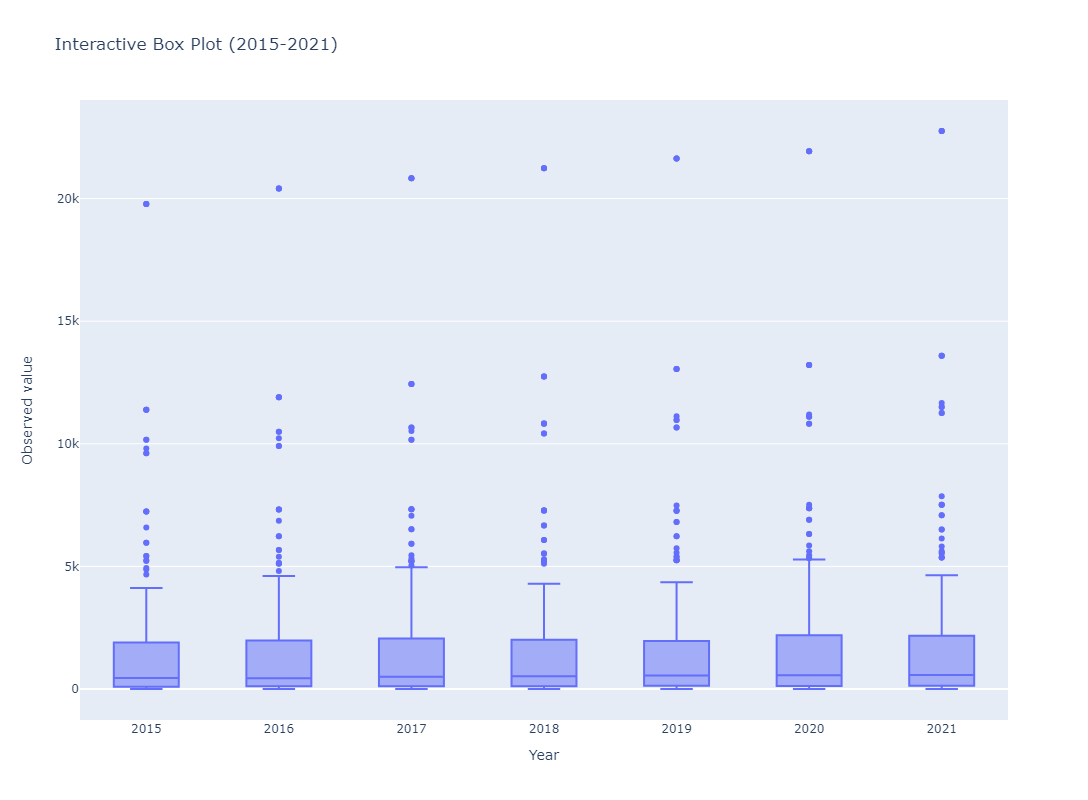

In [136]:
# Filter the DataFrame for years between 2015 and 2021
filtered_df = df[(df['Year'] >= 2015) & (df['Year'] <= 2021)]

# Select the numerical columns for box plots
numerical_columns = ['Year', 'Observed value']

# Create an interactive box plot using Plotly
fig = px.box(filtered_df, x='Year', y='Observed value', title='Interactive Box Plot of the Observed Value (2015-2021)')
# Update the layout to adjust the size of the plot
fig.update_layout(width=1200, height=800)

# Show the plot
fig.show()

**Inferences from Box Plots**

From the box plots it can be easily seen that the median of the observed value drops from 452.19 in 2015 to 441.98 in 2016, thereafter there was a rise in the subsequent years, with it peaking in 2021.

#### Analysis by Sex and Sector

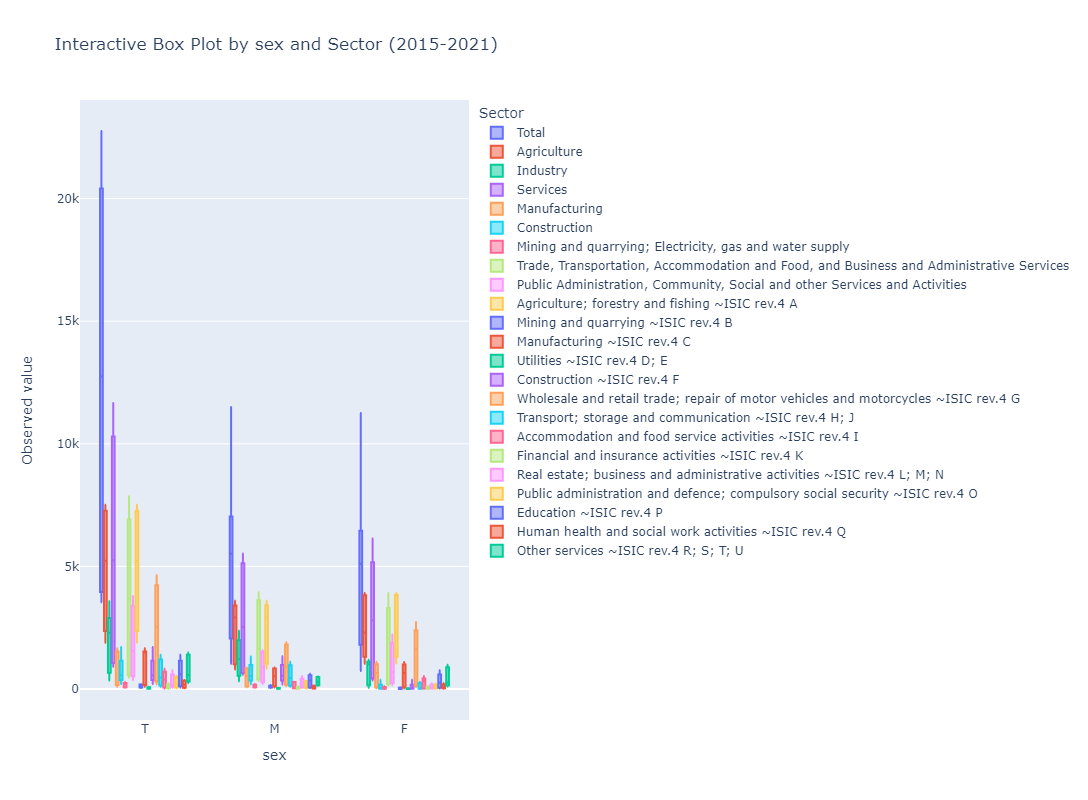

In [137]:
# Filter the DataFrame for years between 2015 and 2021
filtered_df = df[(df['Year'] >= 2015) & (df['Year'] <= 2021)]

# Create an interactive box plot using Plotly
fig = px.box(filtered_df, x='sex', y='Observed value', color='Sector',
             title='Interactive Box Plot by sex and Sector (2015-2021)')
# Update the layout to adjust the size of the plot
fig.update_layout(width=1400, height=800)

# Show the plot
fig.show()

**Inferences from Box Plots**

When both genders are combined, the services sector is seen as the most prevalant of all other sectors, with an an observed value of 11.66k, the Trade, Transportation, Accomodation & Food, Business & Administrative Services following with 7.86k.

Moving on we notice in most sector we have higher observed values on the female gender as compared to the male. Here we also see the services sector having a higher count whether on the male or female side.

We also notice that the mining & quarrying, utilities, construction, Financial and insuarance activities have some of the lowest counts on the observed value

#### Analysis by Sector and Country

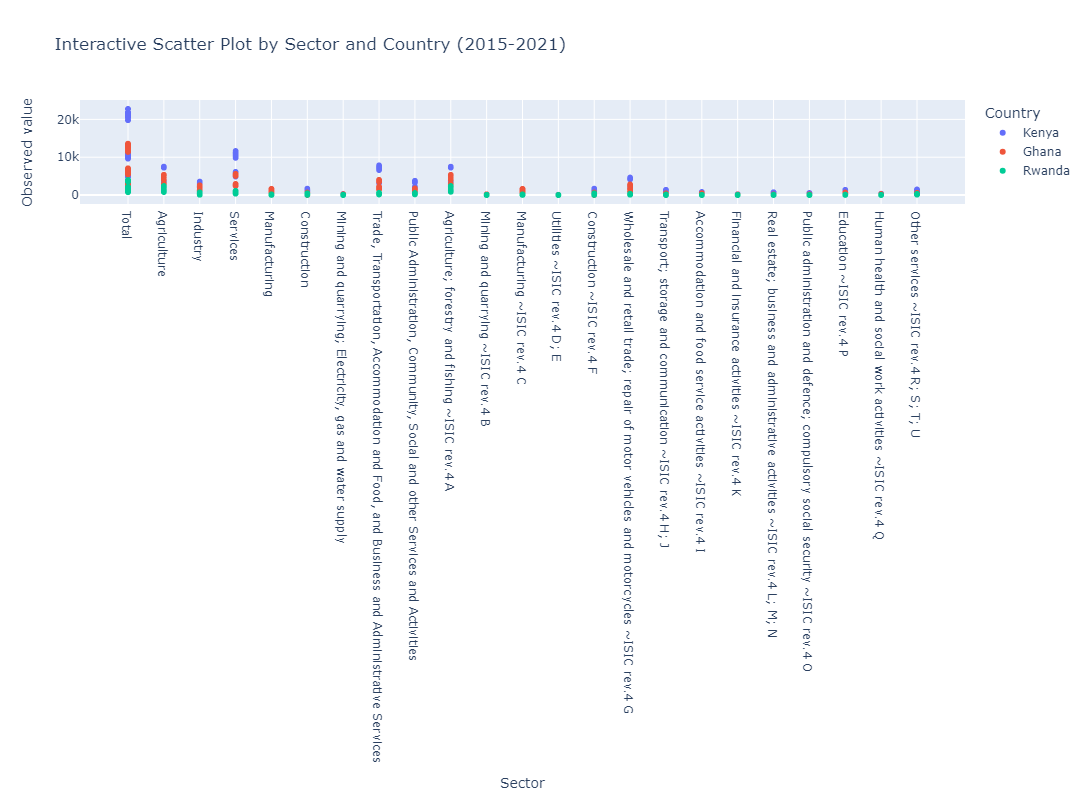

In [143]:
# Create an interactive scatter plot using Plotly
fig = px.scatter(filtered_df, x='Sector', y='Observed value', color='Country',
                 title='Interactive Scatter Plot by Sector and Country (2015-2021)')
# Update the layout to adjust the size of the plot
fig.update_layout(width=1200, height=800)

# Show the plot
fig.show()

**Inferences from the Scatter Plot**

Kenya Leads in all the sectors in terms of the observed value in our data. With Services being the most active sector followed by Trade, Transportation, Accomodation & Food, Business & Administrative Services and then Agriculture.

Ghana follows in most sectors with it leading in the manufacturing sector and Rwanda being the last in every sector. We can attribute this to the low population that the country has generally.

#### Analysis by Sectors in Each Country

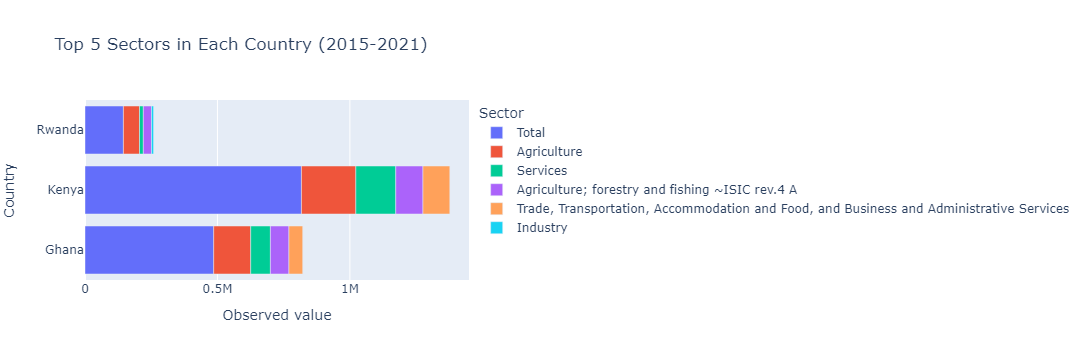

In [152]:
# Group by 'Country' and 'Sector', summing up 'Observed value' for each combination
grouped_df = filtered_df.groupby(['Country', 'Sector'])['Observed value'].sum().reset_index()

# For each country, get the top 5 sectors based on 'Observed value'
top_sectors = grouped_df.groupby('Country').apply(lambda x: x.nlargest(5, 'Observed value')).reset_index(drop=True)

# Create an interactive horizontal bar plot using Plotly
fig = px.bar(top_sectors, y='Country', x='Observed value', color='Sector',
             orientation='h',
             title='Top 5 Sectors in Each Country (2015-2021)')

# Show the plot
fig.show()

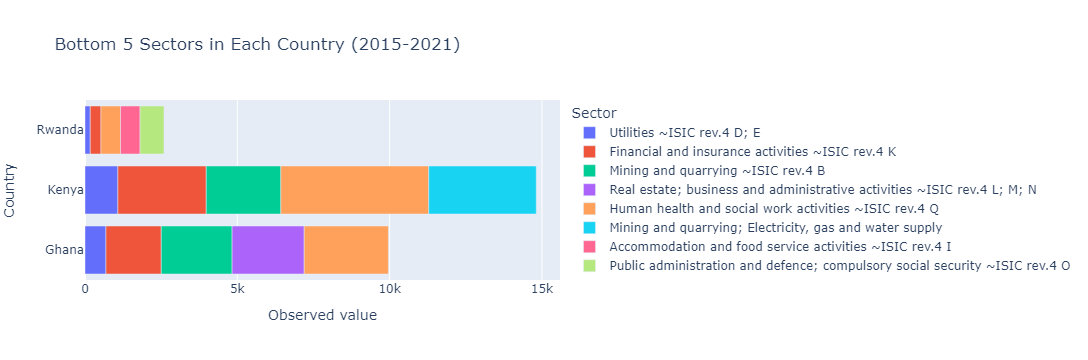

In [153]:
# Group by 'Country' and 'Sector', summing up 'Observed value' for each combination
grouped_df = filtered_df.groupby(['Country', 'Sector'])['Observed value'].sum().reset_index()

# For each country, get the bottom 5 sectors based on 'Observed value'
bottom_sectors = grouped_df.groupby('Country').apply(lambda x: x.nsmallest(5, 'Observed value')).reset_index(drop=True)

# Create an interactive horizontal bar plot using Plotly
fig = px.bar(bottom_sectors, y='Country', x='Observed value', color='Sector',
             orientation='h',
             title='Bottom 5 Sectors in Each Country (2015-2021)')

# Show the plot
fig.show()

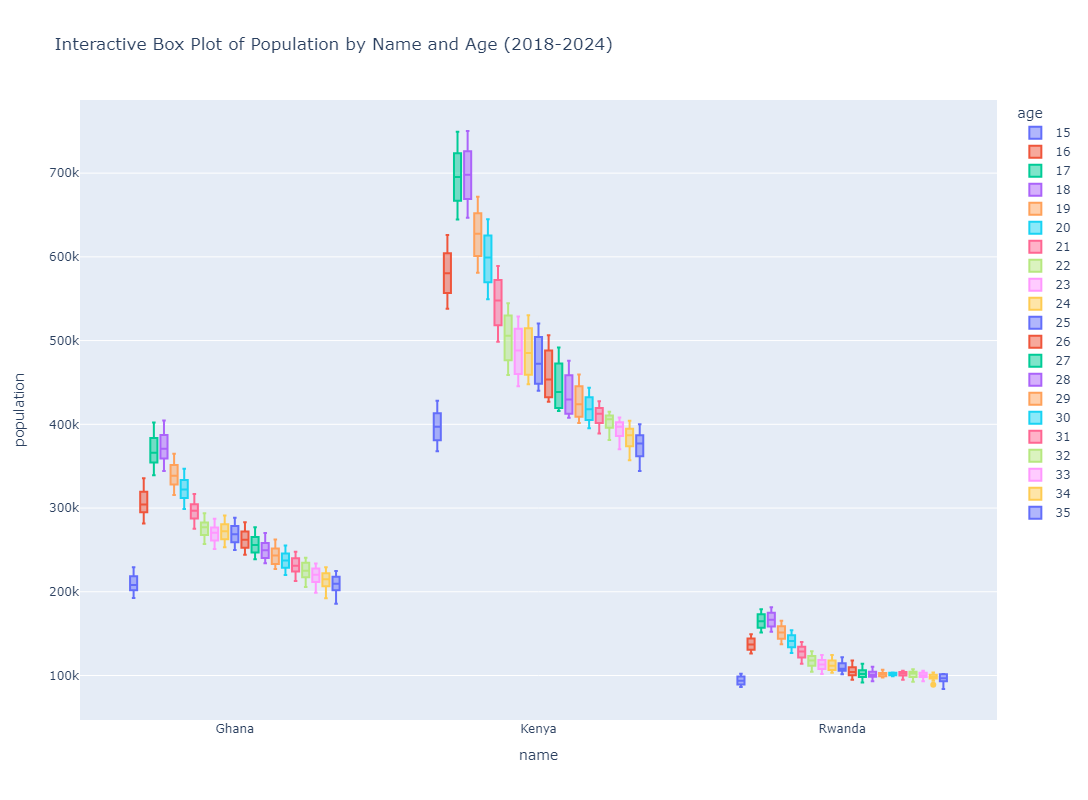

In [163]:
# Filter the DataFrame for years between 2018 and 2024
filtered_datap = Population_data[(Population_data['year'] >= 2018) & (Population_data['year'] <= 2024)]

# Create an interactive box plot using Plotly
fig = px.box(filtered_datap, x='name', y='population', color='age',
             title='Interactive Box Plot of Population by Name and Age (2018-2024)')

# Update the layout to adjust the size of the plot
fig.update_layout(width=800, height=800)

# Show the plot
fig.show()

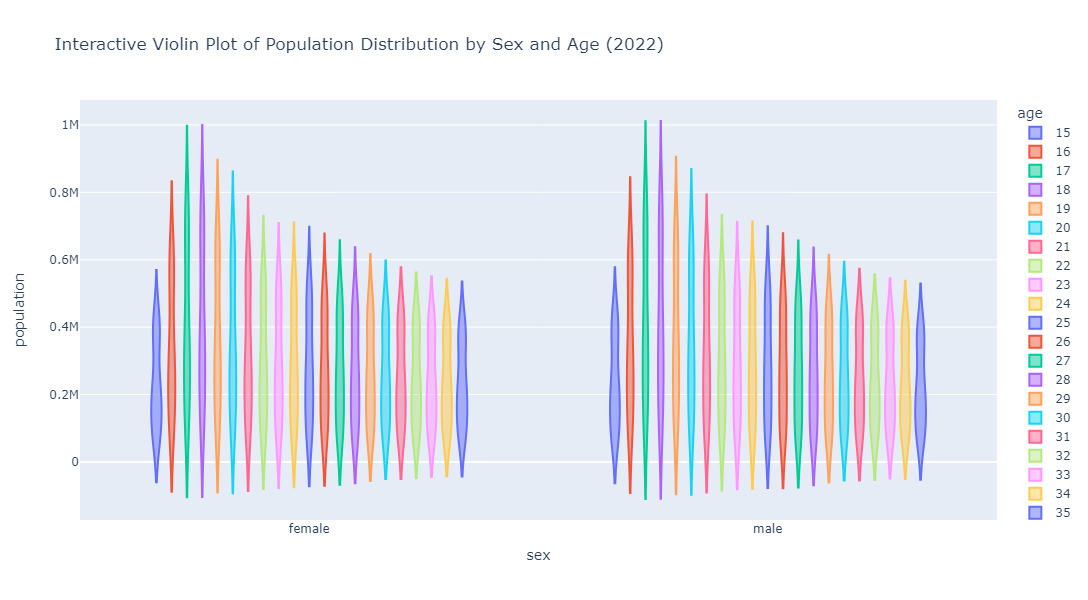

In [179]:
# Create an interactive violin plot using Plotly
fig = px.violin(filtered_datap, x='sex', y='population', color='age',
                title='Interactive Violin Plot of Population Distribution by Sex and Age (2022)')

# Update the layout to adjust the size of the plot
fig.update_layout(width=1000, height=600)

# Show the plot
fig.show()

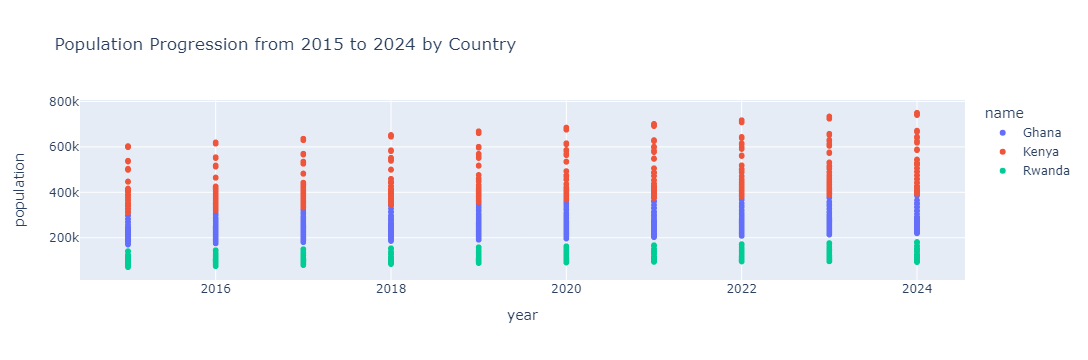

In [199]:
# Create an interactive scatter plot using Plotly
fig = px.scatter(filtered_datapp, x='year', y='population', color='name',
                 title='Population Progression from 2015 to 2024 by Country')

# Show the plot
fig.show()

## Feature Engineering and Model Build

<AxesSubplot:xlabel='Year', ylabel='Observed value'>

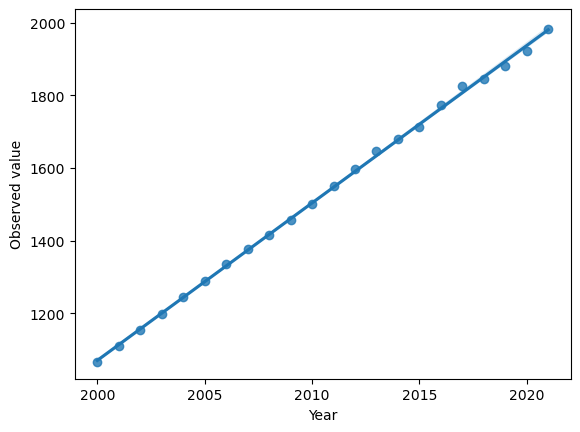

In [186]:
# Grouping the data by years and finding the mean of the observed value

data_df = df.groupby('Year')['Observed value'].mean().reset_index()
sns.regplot(data_df, x='Year', y='Observed value')

**One Hot Encoding Categorical Data**

In [188]:
categorical_data = ['Country', 'sex', 'Sector']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

column_transformer = ColumnTransformer(transformers=[
    ('categorical_columns', categorical_transformer, categorical_data),
], remainder='passthrough')

**Spliting the Data to Training and Testing Sets**

In [190]:
x = df.drop('Observed value', axis=1)
y = df['Observed value']

In [191]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

**XGB Regressor**

In [192]:
# Building our xgb regressor function

def get_xgb_scores(n_estimators):
    pipe = Pipeline(steps=[
        ('one_hot_encoding', column_transformer),
        ('model', XGBRegressor(n_estimators=n_estimators, learning_rate=0.05))])
    
    scores = cross_val_score(pipe, x_train, y_train, cv = 5)
    
    return scores.mean()  

In [201]:
# Checking for cross-validation scores

results = {}

for i in range(1, 11):
    results[500*i] = get_xgb_scores(50*i)

results

{500: 0.9404652390314456,
 1000: 0.9610269664126412,
 1500: 0.9661851326187245,
 2000: 0.9678742301987843,
 2500: 0.9685590866335614,
 3000: 0.9687384871623301,
 3500: 0.9685831148171316,
 4000: 0.9679154400707117,
 4500: 0.9673288874031887,
 5000: 0.9666355913662062}

**Random Forest Regressor**

In [194]:
# Building our Random Forest Regressor

def get_forest_scores(n_estimators):
    pipe = Pipeline(steps=[
        ('one_hot_encoding', column_transformer),
        ('model', RandomForestRegressor(n_estimators=n_estimators))])
    
    scores = cross_val_score(pipe, x_train, y_train, cv = 5)
    
    return scores.mean() 

In [195]:
# Checking for cross-validation scores

results = {}

for i in range(4, 8):
    results[500*i] = get_forest_scores(50*i)

results

{2000: 0.9573029121608332,
 2500: 0.9575719997688588,
 3000: 0.9578202686852364,
 3500: 0.9574883361054806}

**Gradient Boosting Regressor**

In [198]:
def get_model_scores(model):
    pipe = Pipeline(steps=[
        ('one_hot_encoding', column_transformer),
        ('model', model)])
    
    scores = cross_val_score(pipe, x_train, y_train, cv=5)
    
    return scores.mean()

# Creating a Gradient Boosting Regressor instance
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Getting and printing the scores for Gradient Boosting Regressor
gb_scores = get_model_scores(gb_regressor)
print(f"Gradient Boosting Regressor CV Scores: {gb_scores}")

Gradient Boosting Regressor CV Scores: 0.9437173834815766
